In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
df = pd.read_csv('spreadspoke_scores_updated.csv')
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,MIA,LVR,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,TEN,DEN,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,LAC,BUF,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,MIA,NYJ,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,GB,IND,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [3]:
df.info() #values do not seem out of the normal
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12934 entries, 0 to 12933
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        12934 non-null  object 
 1   schedule_season      12934 non-null  int64  
 2   schedule_week        12934 non-null  object 
 3   schedule_playoff     12934 non-null  bool   
 4   team_home_id         12934 non-null  object 
 5   team_away_id         12934 non-null  object 
 6   team_home            12934 non-null  object 
 7   score_home           12797 non-null  float64
 8   score_away           12797 non-null  float64
 9   team_away            12934 non-null  object 
 10  team_favorite_id     10318 non-null  object 
 11  spread_favorite      10318 non-null  float64
 12  over_under_line      10246 non-null  float64
 13  stadium              12934 non-null  object 
 14  stadium_neutral      12934 non-null  bool   
 15  weather_temperature  12008 non-null 

,schedule_season,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph
count,12934.000000,12797.000000,12797.000000,10318.000000,10246.000000,12008.000000,12008.000000
mean,1994.940776,22.392592,19.652887,-5.377883,42.003826,58.701449,7.804880
std,15.558110,10.553462,10.163543,3.427295,4.728393,15.527081,5.643366
min,1966.000000,0.000000,0.000000,-26.500000,28.000000,-6.000000,0.000000
25%,1982.000000,14.000000,13.000000,-7.000000,38.500000,48.000000,3.000000
50%,1996.000000,22.000000,20.000000,-4.500000,42.000000,61.000000,8.000000
75%,2008.000000,29.000000,27.000000,-3.000000,45.000000,72.000000,12.000000
max,2020.000000,72.000000,62.000000,0.000000,63.500000,97.000000,40.000000


In [4]:
df['date']= pd.to_datetime(df['schedule_date']) #convert schedule dates to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12934 entries, 0 to 12933
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        12934 non-null  object        
 1   schedule_season      12934 non-null  int64         
 2   schedule_week        12934 non-null  object        
 3   schedule_playoff     12934 non-null  bool          
 4   team_home_id         12934 non-null  object        
 5   team_away_id         12934 non-null  object        
 6   team_home            12934 non-null  object        
 7   score_home           12797 non-null  float64       
 8   score_away           12797 non-null  float64       
 9   team_away            12934 non-null  object        
 10  team_favorite_id     10318 non-null  object        
 11  spread_favorite      10318 non-null  float64       
 12  over_under_line      10246 non-null  float64       
 13  stadium              12934 non-

In [5]:
df.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home_id               0
team_away_id               0
team_home                  0
score_home               137
score_away               137
team_away                  0
team_favorite_id        2616
spread_favorite         2616
over_under_line         2688
stadium                    0
stadium_neutral            0
weather_temperature      926
weather_wind_mph         926
weather_humidity        4546
weather_detail         10223
date                       0
dtype: int64

In [6]:
#print percentage of missing data
#adjust missing data later
df['schedule_week'].unique()
df['weather_detail'].unique()

array([nan, 'DOME', 'Rain', 'Rain | Fog', 'Fog', 'Snow',
       'DOME (Open Roof)', 'Snow | Fog', 'Snow | Freezing Rain'],
      dtype=object)

Convert playoffs to numbered weeks

In [7]:
df.loc[df.schedule_week == 'WildCard', 'schedule_week'] = 18
df.loc[df.schedule_week == 'Wildcard', 'schedule_week'] = 18
df.loc[df.schedule_week == 'Division', 'schedule_week'] = 19
df.loc[df.schedule_week == 'Conference', 'schedule_week'] = 20
df.loc[df.schedule_week == 'SuperBowl', 'schedule_week'] = 21
df.loc[df.schedule_week == 'Superbowl', 'schedule_week'] = 21
df['schedule_week']=pd.to_numeric(df['schedule_week']) #change playoff names to week numbers


df=df.fillna(value={'weather_detail':'Fair'})


In [8]:
df=df.dropna(thresh=15) #threshold found my increasing until no more missing scores alt: could drop rows where nan for scores

In [9]:
df.isnull().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home_id              0
team_away_id              0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id       2249
spread_favorite        2249
over_under_line        2321
stadium                   0
stadium_neutral           0
weather_temperature     595
weather_wind_mph        595
weather_humidity       4179
weather_detail            0
date                      0
dtype: int64

1. Clean data
2. Want column for ppg at given week for respective schedule season
approach 1: 
3. possible additional column for rank out of the league for ppg 
could rank be useful in machine learning versus the contiuous values 

REPEAT FOR PTS ALLOWED COLUMNS for both HOME/AWAY

columns i want to test:playoff?, weather temp, wind, humidity, user made columns, team id?

WANT TO PREDICT SCORE_HOME AND SCORE_AWAY https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/

if cutting down to shorter set of years, can make column for headcoach years at team
and also qb

through web scraping or finding dataset 

In [10]:
test=df.loc[df['schedule_season']==2018].copy()

In [11]:
newCol=['homePPG','homePAG','awayPPG','awayPAG']
for i in range(len(newCol)):
    test.insert(0,newCol[i],'')


In [12]:
str_year=2008
mod_df=df.loc[df['schedule_season']>=str_year].copy()

In [13]:
mod_df.head()
mod_df.describe()

,schedule_season,schedule_week,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph
count,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,2982.000000,2982.000000
mean,2013.732772,9.303340,23.741198,21.531447,-5.409269,44.769184,62.207914,5.132797
std,3.598979,5.296456,10.355851,9.982517,3.456637,4.477769,15.584175,5.008594
min,2008.000000,1.000000,0.000000,0.000000,-26.500000,31.500000,-6.000000,0.000000
25%,2011.000000,5.000000,17.000000,14.000000,-7.000000,41.500000,52.000000,0.000000
50%,2014.000000,9.000000,24.000000,21.000000,-4.500000,44.500000,68.000000,5.000000
75%,2017.000000,14.000000,31.000000,28.000000,-3.000000,47.500000,72.000000,8.000000
max,2020.000000,21.000000,62.000000,59.000000,0.000000,63.500000,97.000000,40.000000


In [14]:
newCol=['homePPG','homePAG','awayPPG','awayPAG']
for i in range(len(newCol)):
    mod_df.insert(0,newCol[i],'')



In [15]:
#beginning with week one year 2000, averages will begin with actual week scores
mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'awayPAG'] = mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'score_home']
mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'homePPG'] = mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'score_home']
mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'homePAG'] = mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'score_away']
mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'awayPPG'] = mod_df.loc[(mod_df.schedule_week == 1) & (mod_df.schedule_season==str_year), 'score_away']


#mod_df.loc[test.schedule_week == 1, 'homePPG'] = test.loc[test.schedule_week == 1, 'score_home']
#mod_df.loc[test.schedule_week == 1, 'homePAG'] = test.loc[test.schedule_week == 1, 'score_away']
#mod_df.loc[test.schedule_week == 1, 'awayPPG'] = test.loc[test.schedule_week == 1, 'score_away']

#test=test.drop(columns=['stadium_neutral','weather_temperature','weather_wind_mph','spread_favorite','over_under_line'])

In [16]:
mod_df.head(20)
#list(mod_df.columns.values) #confirm columns added


,awayPAG,awayPPG,homePAG,homePPG,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,...,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,date
9474,16,7,7,16,9/4/2008,2008,1,False,NYG,WAS,...,NYG,-4.5,41.5,Giants Stadium,False,79.0,10.0,61,Fair,2008-09-04
9475,34,21,21,34,9/7/2008,2008,1,False,ATL,DET,...,DET,-3.0,41.0,Georgia Dome,False,72.0,0.0,NaN,DOME,2008-09-07
9476,17,10,10,17,9/7/2008,2008,1,False,BAL,CIN,...,CIN,-2.0,37.5,M&T Bank Stadium,False,73.0,8.0,60,Fair,2008-09-07
9477,34,10,10,34,9/7/2008,2008,1,False,BUF,SEA,...,BUF,-1.0,38.5,Ralph Wilson Stadium,False,60.0,8.0,82,Fair,2008-09-07
9478,10,28,28,10,9/7/2008,2008,1,False,CLE,DAL,...,DAL,-6.0,48.5,FirstEnergy Stadium,False,64.0,7.0,76,Fair,2008-09-07
9479,13,29,29,13,9/7/2008,2008,1,False,IND,CHI,...,IND,-10.0,44.0,Lucas Oil Stadium,False,72.0,0.0,NaN,DOME,2008-09-07
9480,14,20,20,14,9/7/2008,2008,1,False,MIA,NYJ,...,NYJ,-3.0,36.0,Sun Life Stadium,False,84.0,9.0,70,Fair,2008-09-07
9481,17,10,10,17,9/7/2008,2008,1,False,NE,KC,...,NE,-16.0,43.5,Gillette Stadium,False,74.0,16.0,72,Fair,2008-09-07
9482,24,20,20,24,9/7/2008,2008,1,False,NO,TB,...,NO,-3.0,42.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,2008-09-07
9483,38,3,3,38,9/7/2008,2008,1,False,PHI,LAR,...,PHI,-8.0,44.0,Lincoln Financial Field,False,73.0,15.0,61,Fair,2008-09-07


In [17]:
mod_df.info()                                                                                            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3323 entries, 9474 to 12796
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   awayPAG              3323 non-null   object        
 1   awayPPG              3323 non-null   object        
 2   homePAG              3323 non-null   object        
 3   homePPG              3323 non-null   object        
 4   schedule_date        3323 non-null   object        
 5   schedule_season      3323 non-null   int64         
 6   schedule_week        3323 non-null   int64         
 7   schedule_playoff     3323 non-null   bool          
 8   team_home_id         3323 non-null   object        
 9   team_away_id         3323 non-null   object        
 10  team_home            3323 non-null   object        
 11  score_home           3323 non-null   float64       
 12  score_away           3323 non-null   float64       
 13  team_away            3323 non

In [18]:
#mod_df=mod_df.drop(columns=['stadium_neutral','weather_temperature','weather_wind_mph','spread_favorite','over_under_line'])
mod_df.isnull().sum()

awayPAG                   0
awayPPG                   0
homePAG                   0
homePPG                   0
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home_id              0
team_away_id              0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     341
weather_wind_mph        341
weather_humidity       2280
weather_detail            0
date                      0
dtype: int64

In [19]:
for i in range(len(mod_df)):
    row=mod_df.iloc[i]
#instead of checking week one, check if current df up to this point is len of zero, then grab last szn
#HOME TEAM
    home_season=mod_df.loc[(mod_df['team_home_id']==row['team_home_id']) | (mod_df['team_away_id']==row['team_home_id'])] #entire df for home team
    if len(home_season.loc[(home_season['schedule_week']<row['schedule_week']) & (home_season['schedule_season']==row['schedule_season'])]): #not week one, can use season avg
        #print('not week1')
        #home_season=home_season.loc[home_season['schedule_season']==row['schedule_season']]
        current=home_season.loc[(home_season['schedule_week']<row['schedule_week']) & (home_season['schedule_season']==row['schedule_season'])] #season of home team up to current week
        sumScored_home=sum(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_home']) #sum of team's points scored in home games
        sumAllowed_home=sum(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_away']) #sum of team's points allowed in home games

        count_home=len(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_home'])
        sumScored_away=sum(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_away']) #sum of team's points scored in away games
        sumAllowed_away=sum(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_home']) #sum of team's points allowed in away games

        count_away=len(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_away'])
        #print(row)
        count=count_home+count_away
        #print(count)
        ppg=(sumScored_away+sumScored_home)/(count)
        pag=(sumAllowed_away+sumAllowed_home)/(count)

        mod_df.homePPG.iloc[i]=ppg
        mod_df.homePAG.iloc[i]=pag
    #print(count_home+count_away)
    #above is for home ppg, pag
        
    elif row['schedule_season']!=str_year:#it is week one, and not str pt. of data - use last season data
        
        #print('elif loop ran, not week 1 and not year str_year')
        #home_season=home_season.loc[home_season['schedule_season']==row['schedule_season']]
        
        current=home_season.loc[home_season['schedule_season']==row['schedule_season']-1] #season of home team previous season
        sumScored_home=sum(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_home']) #sum of team's points scored in home games
        sumAllowed_home=sum(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_away']) #sum of team's points allowed in home games
        count_home=len(current.loc[mod_df['team_home_id']==row['team_home_id'],'score_home'])
        sumScored_away=sum(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_away']) #sum of team's points scored in away games
        sumAllowed_away=sum(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_home']) #sum of team's points allowed in away games

        count_away=len(current.loc[mod_df['team_away_id']==row['team_home_id'],'score_away'])
        count=count_home+count_away
        
        #print(row['team_home_id'],row['schedule_week'],row['schedule_season'])
        ppg=(sumScored_away+sumScored_home)/(count)
        pag=(sumAllowed_away+sumAllowed_home)/(count)
        
        mod_df.homePPG.iloc[i]=ppg
        mod_df.homePAG.iloc[i]=pag
        #print(count_home+count_away)
        #above is for home ppg, pag
        
#away team

    away_season=mod_df.loc[(mod_df['team_home_id']==row['team_away_id']) | (mod_df['team_away_id']==row['team_away_id'])]
    if len(away_season.loc[(away_season['schedule_week']<row['schedule_week']) & (away_season['schedule_season']==row['schedule_season'])]): #not week one, can use season avg
        #print('not week1')
        
        #print(count_home+count_away)
        #above is for home ppg, pag
        away_season=away_season.loc[away_season['schedule_season']==row['schedule_season']]

        
        current=away_season.loc[away_season['schedule_week']<row['schedule_week']] #season of away team up to current week
        sumScored_home=sum(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_home']) #sum of team's points scored in home games
        sumAllowed_home=sum(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_away']) #sum of team's points allowed in home games

        count_home=len(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_home']) 
        sumScored_away=sum(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_away']) #sum of team's points scored in away games
        sumAllowed_away=sum(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_home']) #sum of team's points allowed in away games

        count_away=len(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_away'])

        count=count_home+count_away
        #print('row id',row['team_away_id'],row['schedule_week'],row['schedule_season'])
        ppg=(sumScored_away+sumScored_home)/(count)
        pag=(sumAllowed_away+sumAllowed_home)/(count)
        mod_df.awayPPG.iloc[i]=ppg
        mod_df.awayPAG.iloc[i]=pag

    elif row['schedule_season']!=str_year:#it is week one, and not str pt. of data - use last season data
        

        away_season=away_season.loc[away_season['schedule_season']==row['schedule_season']]
        away_season=mod_df.loc[(mod_df['team_home_id']==row['team_away_id']) | (mod_df['team_away_id']==row['team_away_id'])] #entire df for away team

        current=away_season.loc[away_season['schedule_season']==row['schedule_season']-1] #away teams previous season
        sumScored_home=sum(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_home']) #sum of team's points scored in home games
        sumAllowed_home=sum(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_away']) #sum of team's points allowed in home games

        count_home=len(current.loc[mod_df['team_home_id']==row['team_away_id'],'score_home']) 
        sumScored_away=sum(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_away']) #sum of team's points scored in away games
        sumAllowed_away=sum(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_home']) #sum of team's points allowed in away games

        count_away=len(current.loc[mod_df['team_away_id']==row['team_away_id'],'score_away'])
        
        count=count_home+count_away
        ppg=(sumScored_away+sumScored_home)/(count)
        pag=(sumAllowed_away+sumAllowed_home)/(count)
        mod_df.awayPPG.iloc[i]=ppg
        mod_df.awayPAG.iloc[i]=pag
    #elif (row['schedule_week']==1) & (row['schedule_season']==str_year):
        #print('beginning of set')


/Users/TrentNaPatalung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
mod_df.tail()

,awayPAG,awayPPG,homePAG,homePPG,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,...,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,date
12792,29,12.1429,20.4286,31.1429,11/1/2020,2020,8,False,KC,NYJ,...,KC,-19.5,49.0,Arrowhead Stadium,False,NaN,NaN,NaN,Fair,2020-11-01
12793,17.7143,25.1429,18.8333,26.6667,11/1/2020,2020,8,False,MIA,LAR,...,LAR,-3.5,45.5,Hard Rock Stadium,False,NaN,NaN,NaN,Fair,2020-11-01
12794,34.7143,25.1429,28,23.2857,11/1/2020,2020,8,False,PHI,DAL,...,PHI,-11.5,42.5,Lincoln Financial Field,False,NaN,NaN,NaN,Fair,2020-11-01
12795,19.4286,25.8571,28.6667,33.8333,11/1/2020,2020,8,False,SEA,SF,...,SEA,-3.0,53.5,CenturyLink Field,False,NaN,NaN,NaN,Fair,2020-11-01
12796,20.2857,31.7143,24.8571,17.4286,11/2/2020,2020,8,False,NYG,TB,...,TB,-12.5,45.0,MetLife Stadium,False,NaN,NaN,NaN,Fair,2020-11-02


In [21]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3323 entries, 9474 to 12796
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   awayPAG              3323 non-null   object        
 1   awayPPG              3323 non-null   object        
 2   homePAG              3323 non-null   object        
 3   homePPG              3323 non-null   object        
 4   schedule_date        3323 non-null   object        
 5   schedule_season      3323 non-null   int64         
 6   schedule_week        3323 non-null   int64         
 7   schedule_playoff     3323 non-null   bool          
 8   team_home_id         3323 non-null   object        
 9   team_away_id         3323 non-null   object        
 10  team_home            3323 non-null   object        
 11  score_home           3323 non-null   float64       
 12  score_away           3323 non-null   float64       
 13  team_away            3323 non

In [22]:
mod_df['homePPG']=pd.to_numeric(mod_df['homePPG']) 
mod_df['awayPPG']=pd.to_numeric(mod_df['awayPPG']) 
mod_df['awayPAG']=pd.to_numeric(mod_df['awayPAG']) 
mod_df['homePAG']=pd.to_numeric(mod_df['homePAG']) 


In [23]:
#oob_df=mod_df.loc[mod_df['schedule_season']!=2008, mod_df['schedule_week']!=1]
oob_df=mod_df.query('schedule_season ==2008 and schedule_week == 1')
mod_df.info()
#oob_df.info()
user_input_values=list(range(9474,9490))
mod_df=mod_df.drop(user_input_values)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3323 entries, 9474 to 12796
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   awayPAG              3323 non-null   float64       
 1   awayPPG              3323 non-null   float64       
 2   homePAG              3323 non-null   float64       
 3   homePPG              3323 non-null   float64       
 4   schedule_date        3323 non-null   object        
 5   schedule_season      3323 non-null   int64         
 6   schedule_week        3323 non-null   int64         
 7   schedule_playoff     3323 non-null   bool          
 8   team_home_id         3323 non-null   object        
 9   team_away_id         3323 non-null   object        
 10  team_home            3323 non-null   object        
 11  score_home           3323 non-null   float64       
 12  score_away           3323 non-null   float64       
 13  team_away            3323 non

In [24]:
#!pip3 install tensorflow

import sklearn.model_selection as sk
# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [25]:
mod_df['diff']=mod_df['score_home']-mod_df['score_away']

In [26]:
mod_df.head()

,awayPAG,awayPPG,homePAG,homePPG,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,...,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,date,diff
9490,20.0,14.0,13.0,23.0,9/14/2008,2008,2,False,ARI,MIA,...,-6.5,40.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,2008-09-14,21.0
9491,13.0,29.0,24.0,26.0,9/14/2008,2008,2,False,CAR,CHI,...,-3.0,37.5,Bank of America Stadium,False,78.0,10.0,77,Fair,2008-09-14,3.0
9492,10.0,17.0,17.0,10.0,9/14/2008,2008,2,False,CIN,TEN,...,-1.0,37.0,Paul Brown Stadium,False,79.0,24.0,68,Fair,2008-09-14,-17.0
9493,17.0,38.0,28.0,10.0,9/14/2008,2008,2,False,CLE,PIT,...,-6.5,43.5,FirstEnergy Stadium,False,78.0,20.0,76,Fair,2008-09-14,-4.0
9494,26.0,24.0,14.0,41.0,9/14/2008,2008,2,False,DEN,LAC,...,-1.0,46.5,Sports Authority Field at Mile High,False,54.0,11.0,64,Fair,2008-09-14,1.0


In [27]:
mod_df=mod_df.loc[(mod_df['schedule_season']!=2008)&(mod_df['schedule_week']!=1)]

In [28]:
mod_df=mod_df[['homePAG','awayPAG','homePPG','awayPPG','diff']] #testing
train_df=mod_df.sample(frac=0.8,random_state=200) #random state is a seed value
test_df=mod_df.drop(train_df.index)

In [29]:
features=mod_df[['homePAG','awayPAG','homePPG','awayPPG']]
labels=mod_df['diff']

In [30]:
X_train, X_test, y_train, y_test = sk.train_test_split(features,
                                                    labels,
                                                    test_size=0.33,
                                                    random_state=42)

In [31]:
feature_columns = []

homePAG = tf.feature_column.numeric_column("homePAG")
feature_columns.append(homePAG)

awayPAG = tf.feature_column.numeric_column("awayPAG")
feature_columns.append(awayPAG)

homePPG = tf.feature_column.numeric_column("homePPG")
feature_columns.append(homePPG)

awayPPG = tf.feature_column.numeric_column("awayPPG")
feature_columns.append(awayPPG)

fp_feature_layer = layers.DenseFeatures(feature_columns)

In [32]:
def create_model(my_learning_rate, feature_layer):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(feature_layer)

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model           


def train_model(model, dataset, epochs, batch_size, label_name):
    """Feed a dataset into the model in order to train it."""

    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the mean absolute error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
    plt.show()  

    print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/representation_with_a_feature_cross.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=representation_tf2-colab&hl=en#scrollTo=pedD5GhlDC-y

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
31/31 [==============================] - 0s 1ms/step - loss: 551.9424 - root_mean_squared_error: 23.3205
Epoch 2/10
31/31 [==============================] - 0s 935us/step - loss: 249.7529 - root_mean_squared_error: 15.7984
Epoch 3/10
31/31 [==============================] - 0s 904us/step - loss: 228.4563 - root_mean_squared_error: 15.1094
Epoch 4/10
31/31 [==============================] - 0s 924us/step - loss: 224.9140 - root_mean_squared_error: 14.9937
Epoch 5/10
31/31 [==============================] - 0s 994us/step - loss: 211.8869 - root_mean_squared_error: 14.5489
Epoch 6/10
31/31 [==============================] - 0s 928us/step - loss: 212.4159 - root_mean_squared_error: 14.5717
Epoch 7/10
31/31 [==============================] - 0s 949us/step - loss: 198.5531 - root_mean_squared_error: 14.0887
Epoch 8/10
31/31 [==============================] - 0s 938us/step 

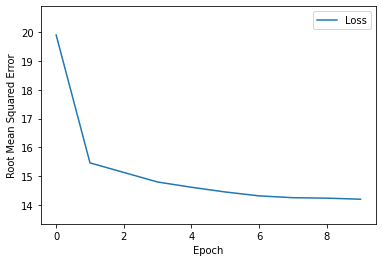

Defined the create_model, train_model, and plot_the_loss_curve functions.

: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
8/8 [==============================] - 0s 1ms/step - loss: 194.3112 - root_mean_squared_error: 13.9396


[194.3112030029297, 13.939555168151855]

In [33]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 10
batch_size = 75
label_name = 'diff'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
#test_label=tf.convert_to_tensor(test_label)
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)